# Session 1

In the first Session it was only to clone the repository with the command, as I already have Anaconda, Python and Juptyer Notebook installed: git clone https://github.com/ageron/handson-ml2

# Session 2

##  Task 1: Fetch the data to working directory

I made an own working directory on my Linux machine and copied the dataset in my working directory

## Task2: Load the data using pandas and take a quick look at it using info () and describe ()

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('datasets/housing.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Task 3: Plot a histogram for each numerical attribute using matplotlib

In [7]:
import matplotlib.pyplot as plt

In [8]:
#get all the numeric coluns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

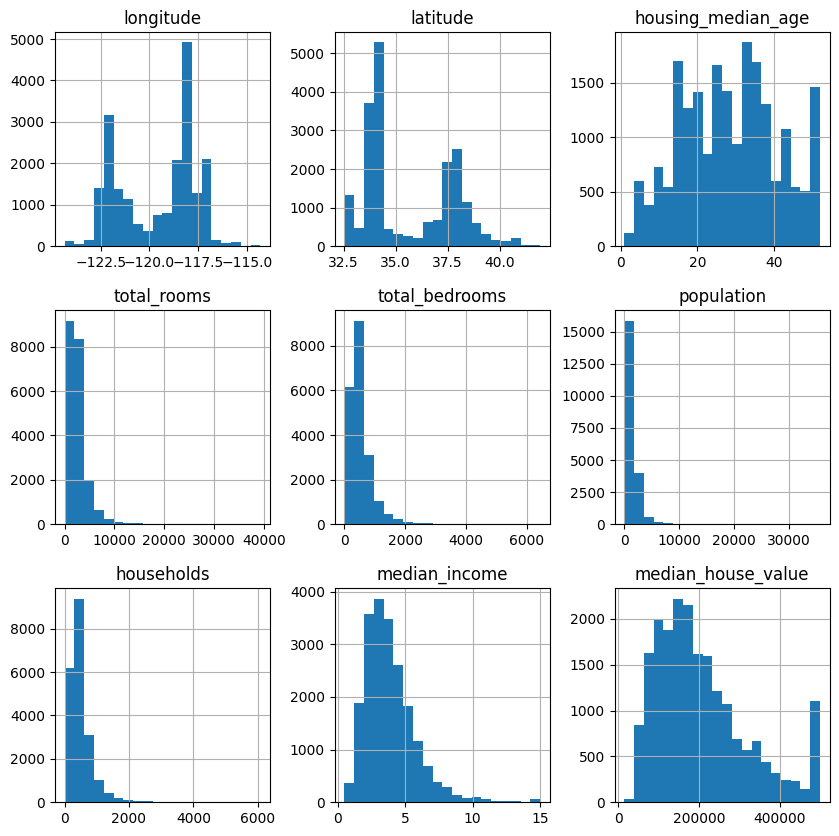

In [9]:
numeric_df.hist(figsize=(10,10), bins=20)
plt.show()

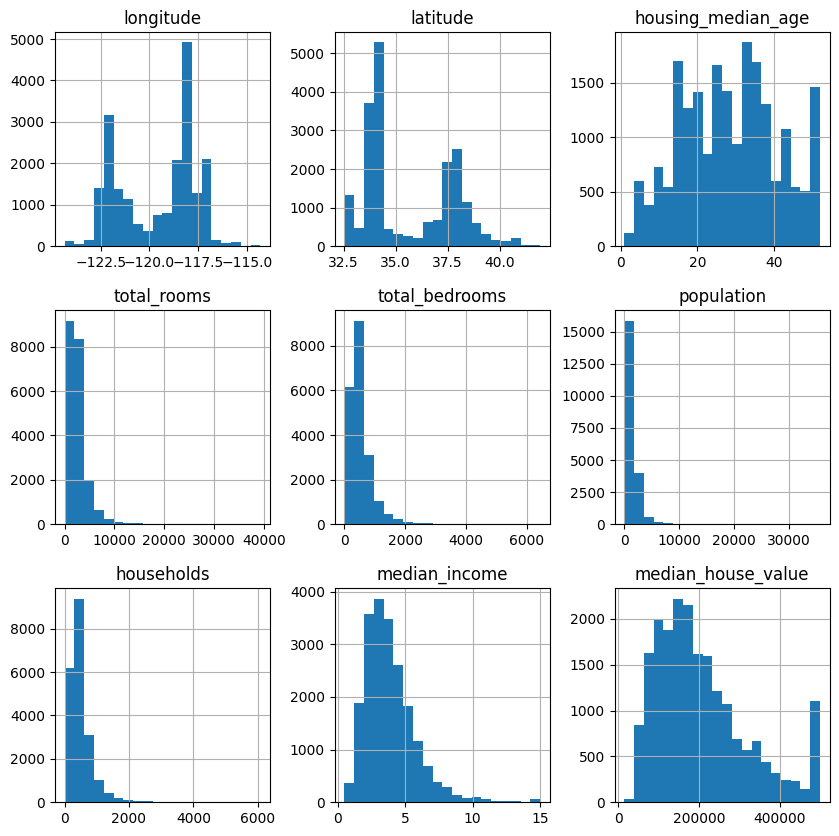

In [10]:
df.hist(figsize=(10,10), bins=20)
plt.show()

## Task 4: Create a test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df, test_size=0.2, shuffle =True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 18464 to 3723
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16355 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 4911 to 12191
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4078 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


## Task 5: Create five income categories from median income attribute

In [15]:
min_value = df['median_income'].min()

In [16]:
max_value = df['median_income'].max()

In [17]:
min_value

np.float64(0.4999)

In [18]:
max_value

np.float64(15.0001)

I create 5 categories based on the min and max value of median_income:
- very low <= 3.0
- low > 3.0 and <= 6.0
- medium >6.0 and <= 9.0
- high > 9.0 and <= 12.0
- very high > 12.0

In [19]:
df['income_category'] = pd.cut(x=df['median_income'], bins=[0, 3.0, 6.0, 9.0, 12.0, float('inf')], labels=("Very_Low", "Low", "Medium", "High", "Very_High"))

In [20]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Medium
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Medium
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Medium
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Low
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Low
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Very_Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Very_Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Very_Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Very_Low


## Task 6: Stratify sampling based on income category and compare the stratified sampling with purely random sampling

In [21]:
train_random, test_random = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
train_stratified, test_stratified = train_test_split(df, test_size=0.2, stratify=df['income_category'], random_state=42)

In [23]:
# Compare density
print("Random Sampling Income Category Density:")
print(test_random['income_category'].value_counts(normalize=True))

print("Stratified Sampling Income Category Density:")
print(test_stratified['income_category'].value_counts(normalize=True))


Random Sampling Income Category Density:
income_category
Low          0.525921
Very_Low     0.364583
Medium       0.089632
High         0.014293
Very_High    0.005572
Name: proportion, dtype: float64
Stratified Sampling Income Category Density:
income_category
Low          0.526890
Very_Low     0.358527
Medium       0.094719
High         0.014293
Very_High    0.005572
Name: proportion, dtype: float64


In [24]:
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

In [25]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(test_stratified),
    "Random": income_cat_proportions(test_random),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_category,,,,,
Very_Low,0.358672,0.358527,0.364583,1.647981,-4.052411e-02
Low,0.526890,0.526890,0.525921,-0.183908,0.000000e+00
Medium,0.094719,0.094719,0.089632,-5.370844,-1.421085e-14
High,0.014244,0.014293,0.014293,0.340136,3.401361e-01
Very_High,0.005475,0.005572,0.005572,1.769912,1.769912e+00


## Task 9: Compute correlation

In [27]:
correlation_matrix = numeric_df.corr()

In [28]:
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000
